### Implement Q-learning

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
grid_size = 10
n_actions = 4  # 0, 1, 2, 3  =>  Left, Right, Up, Down
target    = (7,7)
pitfall   = (5,3)

rewards = np.full((grid_size, grid_size), -2)
rewards[target] = 100  # Goal state
rewards[pitfall] = -100  # Pitfall state

rewards[(7,6)] = 2

rewards

array([[  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2, -100,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,    2,  100,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2],
       [  -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2,   -2]])

In [3]:
Q_table = np.zeros((grid_size, grid_size, n_actions))

epsilon = 0.01  # Randome action
alpha   = 0.4   # Learning rate
gamma   = 0.98  # Discount factor for future rewards

def choose_action(Q_table, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.randint(0, n_actions)
    else:
        return np.argmax(Q_table[state])

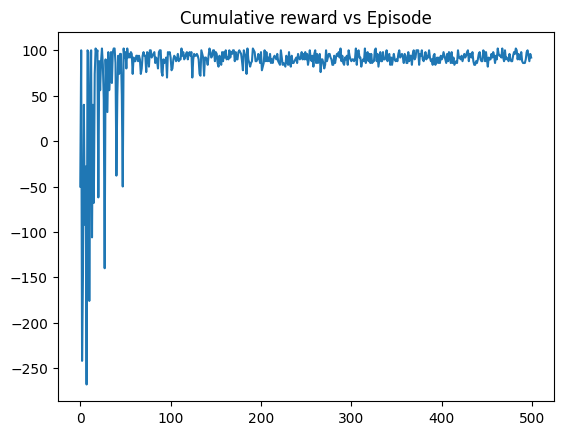

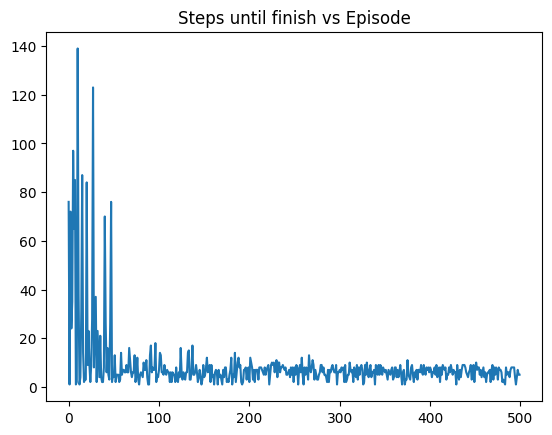

In [4]:
cumulative_rewards = []
episode_lengths = []

for episode in range(500):
    state = (np.random.randint(0, grid_size), np.random.randint(0, grid_size))
    done = False
    total_reward = 0
    steps = 0

    while not done:
        steps += 1
        reward = 0
        action = int(choose_action(Q_table, state, epsilon))

        if action == 0: # Left
            if state[1]%grid_size != 0:
                next_state = (state[0], state[1] - 1)
            elif state[0] > 0:
                next_state = (state[0] - 1, grid_size - 1)
            else:
                next_state = (grid_size - 1, grid_size - 1)

        elif action == 1: # Right
            if state[1]%grid_size != grid_size - 1:
                next_state = (state[0], state[1] + 1)
            elif state[0] < grid_size - 1:
                next_state = (state[0] + 1, 0)
            else:
                next_state = (0, 0)

        elif action == 2 and state[0] > 0: # Up
            next_state = (state[0] - 1, state[1])

        elif action == 3 and state[0] < grid_size - 1: # Down
            next_state = (state[0] + 1, state[1])

        else: # blocked on the top or bottom borders
            next_state = state

        reward = rewards[next_state]
        total_reward += reward

        # Update Q-value using Bellman equation
        Q_table[state + (int(action),)] = Q_table[state + (int(action),)] + alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state + (int(action),)])

        state = next_state
        if next_state == target or next_state == pitfall or steps > 200:
            done = True

    episode_lengths.append(steps)
    cumulative_rewards.append(total_reward)


Q_table[target] = [0, 0, 0, 0]
Q_table[pitfall] = [0, 0, 0, 0]

plt.plot(cumulative_rewards)
plt.title("Cumulative reward vs Episode")
plt.show()
plt.plot(episode_lengths)
plt.title("Steps until finish vs Episode")
plt.show()

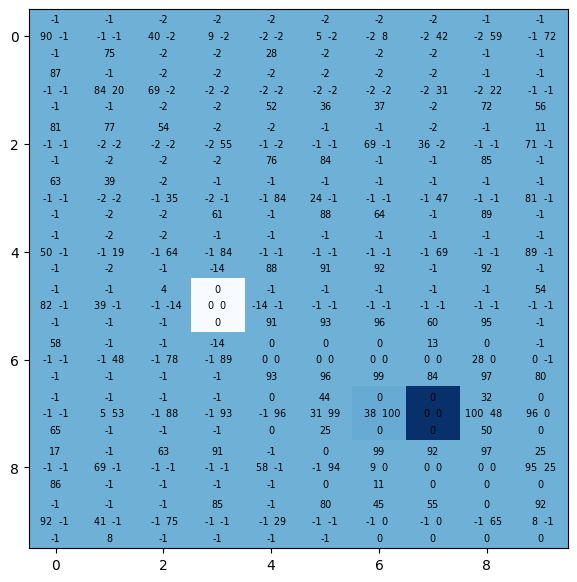

In [5]:
Q_table2 = Q_table / Q_table.max() * 100

plt.figure(figsize=(7,7))
plt.imshow(rewards, cmap="Blues")
# LRUD
for j in range(grid_size):
    for i in range(grid_size):
        plt.text(j,i,f"{round(Q_table2[(i, j, 0)])} ", ha="right", va="center", size="x-small")
        plt.text(j,i,f" {round(Q_table2[(i, j, 1)])}", ha="left", va="center", size="x-small")
        plt.text(j,i,f"{round(Q_table2[(i, j, 2)])}\n", ha="center", va="bottom", size="x-small")
        plt.text(j,i,f"\n{round(Q_table2[(i, j, 3)])}", ha="center", va="top", size="x-small")
plt.show()